In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [29]:
df = pd.read_csv('datasets/happiness.csv')
df.head(8)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380


In [5]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

# ¿Cuál es la distribución de la Esperanza de Vida de los países durante el 2019?

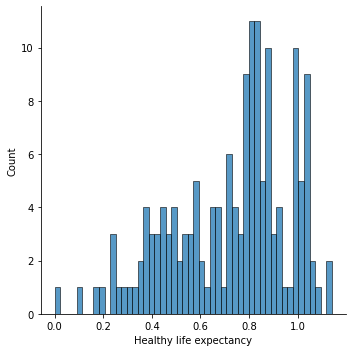

In [6]:
sns.displot(df['Healthy life expectancy'],
             #kde = True, #Whether to plot a gaussian kernel density estimate.
             bins = 50 #cuantas barras del histograma. Default = 10
            )
#plt.show()

### La distribución de los datos presenta un sesgo a la izquierda y la figura a la que más relacion presenta es a la distribución de Weibull

# ¿Existe correlación entre el puntaje de Felicidad [Score] con la Libertad de Tomar Decisiones?

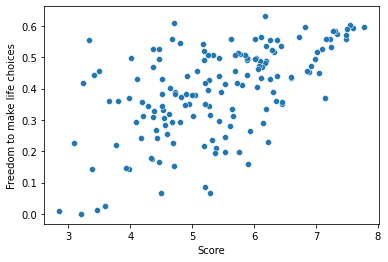

In [15]:
# Se realiza una gráfica de dispersión entre estas dos variables
sns.scatterplot(x = df['Score'],
                y = df['Freedom to make life choices'],
                data = df
               )
#sns.lmplot(x="Score", y="Freedom to make life choices", data = df);

In [10]:
from scipy import stats
stats.pearsonr(df['Score'], df['Freedom to make life choices'])

(0.5667418257199901, 1.2379243627982124e-14)

### Visto el coeficiente de Pearson (0.56) se observa una relación poco fuerte en donde no se le puede atribuir la libertad de decisión directamente a la felicidad de los países

Text(0.5, 1.0, 'Gráfica de Línea de Generosidad')

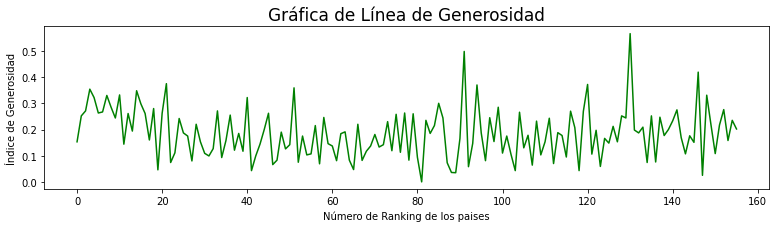

In [41]:
df['Generosity'].plot(kind = 'line', color="green", figsize =(13,3))

plt.xlabel('Número de Ranking de los paises')
plt.ylabel('Índice de Generosidad')

plt.title('Gráfica de Línea de Generosidad', fontsize = 17)

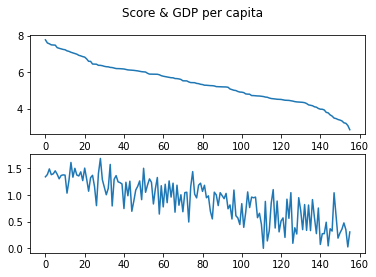

In [46]:
fig, axs = plt.subplots(2)
fig.suptitle('Score & GDP per capita')
axs[0].plot(df['Score'])
axs[1].plot(df['GDP per capita'])

In [48]:
tabla_pivote = pd.pivot_table(df,
                          index = 'Country or region',
                          values = 'Generosity',
                          aggfunc = 'sum',#['sum','median']
                          columns = 'Healthy life expectancy',
                          #margins = True #Margin crea una nueva columna que suma todo
                         )
tabla_pivote

Healthy life expectancy,0.000,0.105,0.168,0.192,0.232,0.242,0.245,0.268,0.295,0.308,...,1.029,1.036,1.039,1.042,1.045,1.052,1.062,1.088,1.122,1.141
Country or region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
